In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('processed_reviews.csv')
df = df[['id', 'listing_id','comments', 'latitude', 'longitude']]
df['comments'] = df['comments'].astype(str)

In [3]:
original_df = pd.read_csv('reviews.csv')
original_df = original_df[['id', 'comments']]
original_df['comments'] = original_df['comments'].astype(str)

In [4]:
df.head()

,id,listing_id,comments,latitude,longitude
0,30672,11551,flat bright comfortable clean adriano pleasant...,51.46225,-0.11732
1,32236,11551,week apartment great clean lot place close tub...,51.46225,-0.11732
2,41044,11551,host first morning dining table breakfast flat...,51.46225,-0.11732
3,48926,11551,wonderful stay valerio interesting interested ...,51.46225,-0.11732
4,63238,11551,great place wonderful host friendly respectful...,51.46225,-0.11732


In [5]:
from nltk.corpus import wordnet as wn

In [6]:
def lemmatization(word): # filter noun and adjective
    pos_w = set()   
    for w in wn.synsets(word):
        if w.name().split('.')[0] == word:
            pos_w.add(w.pos())
    return u'a' in pos_w or u's' in pos_w

def freq_words_adj(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    fdict = {k:v for k,v in fdist.most_common(3000) if lemmatization(k) == True}
    
    return fdict

In [7]:
def plot_freq(fdict, terms = 30):
    words_df = pd.DataFrame({'word':list(fdict.keys()), 'count':list(fdict.values())})
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(30,10))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set_xticklabels(d['word'][:terms], rotation = -55, fontsize = 12)
    ax.xaxis.set_ticks_position('bottom')
    ax.set(ylabel = 'Count')
    plt.show()

In [8]:
comments = df['comments']

In [9]:
fdict = freq_words_adj(comments)

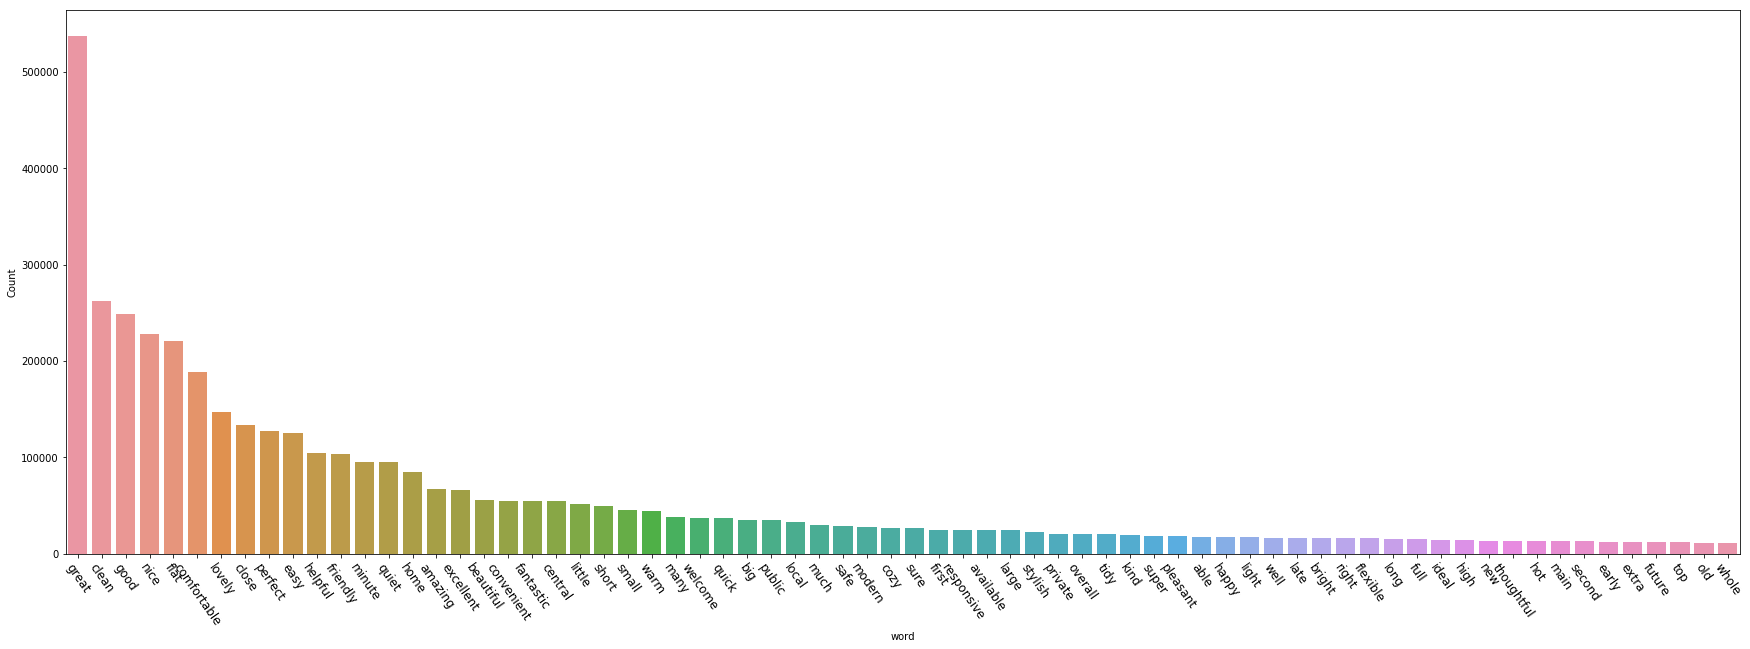

In [67]:
plot_freq(fdict, 70)

In [114]:
neatness = ['clean', 'nice', 'comfortable', 'modern', 'tidy', 'stylish', "convenient", "thoughtful", "interesting", "huge", "enjoyable", "relaxed", "adorable", "suitable", "fit", "apt", "roomy", "ample", "extensive"]
location = ['quiet', 'beautiful', 'quick', 'safe', 'quickly', 'easy', "central", "accessible", "nearby", "serene"]
host = ['helpful', 'friendly', 'responsive', 'available', 'kind', 'pleasant', 'punctual', "flexible", "hospitable", "attentive", "communicative", "accommodating", "gracious", "prompt", "professional", "informative", "understanding", "respectful", "reliable", "knowledgeable", "caring", "courteous", "answering", "nervous", "amenable"]
overall = ['great', 'good', 'perfect', 'super', 'high', 'ideal', 'happy', 'amazing', 'excellent', "right", "ideal", "cute", "fabulous", "brilliant", "free", "gorgeous", "useful", "handy", "charming", "superb", "incredible", "outstanding", "delightful", "welcoming", "stunning", "vibrant", "practical", "satisfied", "glad", "adequate", "memorable", "proper", "seamless"]

neatness_a = ["terrific", "uncomfortable", "narrow", "tight", "awkward", "aesthetic", "awful"]
location_a = ["loud", "annoying", "inconvenient", "intrusive", "crowded", "bustiling", "stuffy"]
host_a = []
overall_a = ["negative", "wrong", "sad", "poor", "unable", "limited", "odd", "disappointing", "minimalist"]

In [115]:
def find_similarities(words, words_antonyms, min_acceptable_reputation=2):
    synonyms = set()
    antonyms = set()
    for word in words:
        for syn in wn.synsets(word):
            if '_' not in syn.name().split(".")[0]:
                synonyms.add(syn.name().split(".")[0])
            for lemma in syn.lemmas():
                if lemma.count() < min_acceptable_reputation:
                    continue
                if '_' not in lemma.name():
                    synonyms.add(lemma.name())
                if lemma.antonyms():
                    if '_' not in lemma.antonyms()[0].name() and lemma.antonyms()[0].name() != word and lemma.antonyms()[0].name() not in synonyms:
                        antonyms.add(lemma.antonyms()[0].name())
    return synonyms, antonyms        

In [116]:
neatness_syn, neatness_ant = find_similarities(neatness, neatness_a)
print(neatness_syn)
print(neatness_ant)

{'interest', 'loosen', 'desirable', 'set', 'pertinent', 'convenient', 'relax', 'suited', 'sporting', 'advanced', 'fit', 'match', 'broad', 'cleanse', 'liable', 'plumb', 'houseclean', 'uninfected', 'goodly', 'huge', 'correspond', 'prosperous', 'decent', 'roommate', 'tidy', 'relaxed', 'interesting', 'clean', 'slack', 'burst', 'extensive', 'stylish', 'immense', 'fairly', 'wide', 'suitable', 'roomy', 'vast', 'kempt', 'fashionable', 'adorable', 'nice', 'courteous', 'paroxysm', 'comfortable', 'mod', 'modern', 'enjoyable', 'thoughtful', 'equip', 'primed', 'meet', 'heedful', 'agree', 'scavenge', 'blank', 'commodious', 'sizable', 'suit', 'concern', 'occupy', 'plentiful', 'ample', 'respectable', 'dainty', 'accommodate', 'apposite', 'across-the-board', 'apt'}
{'uncomfortable', 'bore', 'uninteresting', 'inconvenient', 'tense', 'meager', 'nasty', 'disagree', 'dirty', 'unfashionable', 'nonmodern', 'unfit'}


In [117]:
location_syn, location_ant = find_similarities(location, location_a)
print(location_syn)
print(location_ant)

{'fundamental', 'subdued', 'condom', 'calm', 'still', 'serene', 'quick', 'flying', 'safe', 'cardinal', 'repose', 'lull', 'easily', 'key', 'nearby', 'slowly', 'tranquillity', 'easy', 'placid', 'slow', 'prosperous', 'central', 'speedily', 'beautiful', 'cursorily', 'accessible', 'serenity', 'rapidly', 'quiet', 'comfortable', 'quieten', 'quietly', 'dependable', 'hushed', 'immediate', 'agile', 'quickly', 'silence', 'promptly'}
{'unquiet', 'agitate', 'slowly', 'ugly', 'noisy', 'sound', 'dangerous', 'peripheral', 'unquietly', 'difficult'}


In [118]:
host_syn, host_ant = find_similarities(host, host_a)
print(host_syn)
print(host_ant)

{'flexible', 'intimate', 'enlightening', 'communicative', 'kind', 'knowledgeable', 'move', 'incite', 'instructive', 'sympathize', 'reconcile', 'do', 'attentive', 'handle', 'respectful', 'authentic', 'deal', 'heedful', 'compromising', 'learned', 'apprehension', 'lodge', 'sort', 'master', 'fit', 'professional', 'reliable', 'nervous', 'gracious', 'sympathy', 'form', 'agreement', 'pleasant', 'skittish', 'realize', 'immediate', 'reply', 'aflutter', 'friendly', 'illuminating', 'anxious', 'reactive', 'oblige', 'hold', 'answer', 'elastic', 'available', 'well-educated', 'wish', 'prompt', 'like', 'reason', 'caring', 'punctual', 'remind', 'benignant', 'respond', 'worry', 'see', 'dependable', 'motivate', 'knowing', 'accommodating', 'care', 'responsive', 'resolve', 'answering', 'understand', 'manage', 'courteous', 'inspire', 'helpful', 'amenable', 'honest', 'informative', 'suit', 'suffice', 'adapt', 'lovingness', 'hospitable', 'accommodate', 'understanding', 'translate'}
{'disrespectful', 'unavaila

In [119]:
overall_syn, overall_ant = find_similarities(overall, overall_a)
print(overall_syn)
print(overall_ant)

{'heights', 'gladiolus', 'complimentary', 'rid', 'mythological', 'cute', 'relieve', 'satisfy', 'perplex', 'loose', 'well', 'capital', 'glad', 'barren', 'ideal', 'brilliant', 'properly', 'useful', 'thoroughly', 'rightfield', 'adequate', 'bright', 'magnificent', 'enough', 'amaze', 'exempt', 'brainy', 'felicitous', 'eminent', 'full', 'utilitarian', 'bang-up', 'commodity', 'veracious', 'respectable', 'astound', 'cunning', 'vibrant', 'memorable', 'ace', 'gratify', 'puzzle', 'big', 'skillful', 'utter', 'handy', 'right', 'gamey', 'sensational', 'adept', 'hardheaded', 'goodness', 'charm', 'expert', 'superintendent', 'excellent', 'absolve', 'salient', 'vivacious', 'effective', 'magic', 'perfect', 'quenched', 'beaming', 'arrant', 'pure', 'meet', 'dear', 'welcome', 'proficient', 'delicious', 'happy', 'receive', 'arresting', 'free', 'stunning', 'detached', 'superb', 'seamless', 'outstanding', 'fulfill', 'proper', 'gorgeous', 'stun', 'great', 'correct', 'mighty', 'fill', 'high', 'extremely', 'captu

In [120]:
labeled_rows = 50000
msk_size = (labeled_rows / df.count())[0]
msk_size

0.0455323644046188

In [159]:
msk = np.random.rand(len(df)) < msk_size

In [160]:
to_label_df = df[msk]
to_label_df.count()[0]

49949

In [161]:
to_label_df.head(10)

,id,listing_id,comments,latitude,longitude
6,79600,11551,place road convenient minute slow line room small comfortable clean wireless internet bathroom spacious clean wonderful host ready help fantastic cappuccino breakfast daughter great place night safe,51.46225,-0.11732
40,797602,11551,room cozy comfortable small neighborhood vibrant life little time company polite respectful,51.46225,-0.11732
52,1207182,11551,flat close flexible host good tip place neighbourhood money wise way,51.46225,-0.11732
67,2770984,11551,week apartment apartment comfortable close tube great neighborhood pub block thank adriano hospitality,51.46225,-0.11732
87,12602063,11551,flat exciting interesting area flat highlight corner adriano reliable likeable host,51.46225,-0.11732
95,23273891,11551,great flat fantastic location wonderful host,51.46225,-0.11732
102,38910059,11551,delightful person thing gorgeous happy,51.46225,-0.11732
107,58574454,11551,guy good guest flat clean nice thank,51.46225,-0.11732
108,76018041,11551,great location nice apartment clean quiet,51.46225,-0.11732
132,237773967,11551,lot light quiet excellent transport connection friendly communicative helpful host,51.46225,-0.11732


In [162]:
def make_score(pos_words, neg_words, min_score = 1):
    initial_score = 3 # with premeditation not start counting from half (4) but from point less
    min_score = 1
    max_score = 7
    
    if pos_words == 0 and neg_words == 0:
        return initial_score
    
    if neg_words > 0:
        return max(min_score, initial_score - neg_words)
    
    return min(max_score, initial_score + pos_words)

In [163]:
def create_rate(comment, label_synonyms, label_antonyms):
    pos_words = 0
    neg_words = 0
    words = comment.split()
    for word in words:
        if word in label_synonyms:
            pos_words +=1
            continue
        if word in label_antonyms:
            neg_words +=1
    return make_score(pos_words, neg_words)

In [164]:
labeled_df = to_label_df.copy()

In [165]:
labeled_df['neatness'] = labeled_df['comments'].apply(create_rate, args = (neatness_syn, neatness_ant,))
labeled_df['location'] = labeled_df['comments'].apply(create_rate, args = (location_syn, location_ant,))
labeled_df['host'] = labeled_df['comments'].apply(create_rate, args = (host_syn, host_ant,))
labeled_df['overall'] = labeled_df['comments'].apply(create_rate, args = (overall_syn, overall_ant,))

In [166]:
labeled_df.head(20)

,id,listing_id,comments,latitude,longitude,neatness,location,host,overall
6,79600,11551,place road convenient minute slow line room small comfortable clean wireless internet bathroom spacious clean wonderful host ready help fantastic cappuccino breakfast daughter great place night safe,51.46225,-0.11732,7,6,3,4
40,797602,11551,room cozy comfortable small neighborhood vibrant life little time company polite respectful,51.46225,-0.11732,4,4,4,4
52,1207182,11551,flat close flexible host good tip place neighbourhood money wise way,51.46225,-0.11732,3,3,4,4
67,2770984,11551,week apartment apartment comfortable close tube great neighborhood pub block thank adriano hospitality,51.46225,-0.11732,4,4,3,4
87,12602063,11551,flat exciting interesting area flat highlight corner adriano reliable likeable host,51.46225,-0.11732,4,3,4,3
95,23273891,11551,great flat fantastic location wonderful host,51.46225,-0.11732,3,3,3,4
102,38910059,11551,delightful person thing gorgeous happy,51.46225,-0.11732,3,3,3,6
107,58574454,11551,guy good guest flat clean nice thank,51.46225,-0.11732,5,3,3,4
108,76018041,11551,great location nice apartment clean quiet,51.46225,-0.11732,5,4,3,4
132,237773967,11551,lot light quiet excellent transport connection friendly communicative helpful host,51.46225,-0.11732,3,4,6,4


In [167]:
def show_labeled_results(column_name):
    print(labeled_df.groupby(column_name).count().reset_index()[[column_name, 'comments']])

In [168]:
show_labeled_results('neatness')
show_labeled_results('location')
show_labeled_results('host')
show_labeled_results('overall')

   neatness  comments
0         1        14
1         2       237
2         3     23656
3         4     15564
4         5      7484
5         6      2246
6         7       748
   location  comments
0         1        16
1         2       530
2         3     29430
3         4     13795
4         5      4469
5         6      1266
6         7       443
   host  comments
0     1         1
1     2        25
2     3     35667
3     4     10436
4     5      3176
5     6       554
6     7        90
   overall  comments
0        1        21
1        2       477
2        3     13750
3        4     18539
4        5     10641
5        6      4298
6        7      2223


In [169]:
commented_df = pd.merge(labeled_df, original_df, left_on='id', right_on='id', how='left')
commented_df.drop(['id_y'], axis=1, inplace=True)

KeyError: "['id_y'] not found in axis"

In [170]:
pd.set_option("display.max_colwidth", 350)
commented_df.head(25)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
0,79600,11551,place road convenient minute slow line room small comfortable clean wireless internet bathroom spacious clean wonderful host ready help fantastic cappuccino breakfast daughter great place night safe,51.46225,-0.11732,7,6,3,4,"the place is in a quiet side road, very convenient (a 2 minute slow walk) to the tube on Victoria line. The room is a bit small but very comfortable, clean and well organized, including wireless internet! The bathroom is spacious and clean. Adriano is a wonderful host, very kind and ready to help. Also he prepares a fantastic cappuccino at bre..."
1,797602,11551,room cozy comfortable small neighborhood vibrant life little time company polite respectful,51.46225,-0.11732,4,4,4,4,"The room is cozy and comfortable, even though it is small. The neighborhood has a vibrant life.\r\nWe had little time with Adriano, but even so we could enjoy his company and know his other house. He's very polite, caring and respectful."
2,1207182,11551,flat close flexible host good tip place neighbourhood money wise way,51.46225,-0.11732,3,3,4,4,The flat is very well located - extremely close to Brixton Subway Station and very clean. Adriano is an attentive and flexible host. He can also give you good tips on places to eat in the neighbourhood and on how to save some money in a wise way during your stay in London.
3,2770984,11551,week apartment apartment comfortable close tube great neighborhood pub block thank adriano hospitality,51.46225,-0.11732,4,4,3,4,My Dad and I spent a week at Adriano's apartment while staying in London and couldn't of been more perfect. The apartment is well kept and comfortable. It's close to the tube and has a great neighborhood pub just two blocks away. Thanks Adriano for the hospitality!\r\n\r\n
4,12602063,11551,flat exciting interesting area flat highlight corner adriano reliable likeable host,51.46225,-0.11732,4,3,4,3,"Adrianos flat lies in an exciting and interesting area. The flat has everything what one needs and is just as described. You reach all highlights from London shortly by the underground which is around the corner. Adriano is a very reliable and likeable host. If we come back to London, then certainly again here."
5,23273891,11551,great flat fantastic location wonderful host,51.46225,-0.11732,3,3,3,4,"Great flat, fantastic location, wonderful host."
6,38910059,11551,delightful person thing gorgeous happy,51.46225,-0.11732,3,3,3,6,Adriano is a most delightful person. We met him and he showed us how every thing worked. So gorgeous and happy
7,58574454,11551,guy good guest flat clean nice thank,51.46225,-0.11732,5,3,3,4,Adriano is a very nice guy who looks good after his guests. The flat was clean and everything we needed was there. Would be nice to go there again. Thanks for everything!
8,76018041,11551,great location nice apartment clean quiet,51.46225,-0.11732,5,4,3,4,"Great location, nice apartment,clean and quiet."
9,237773967,11551,lot light quiet excellent transport connection friendly communicative helpful host,51.46225,-0.11732,3,4,6,4,"A nice and spacious that gets a lot of light. Well situated on a quiet street in lively Brixton with excellent transport connections. Adriano is a friendly, communicative and helpful host."


In [171]:
commented_df[commented_df['neatness'] < 3].head(59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
64,1278715,38407,perfect spot city busy nice long day apartment clean picture couple great host helpful flexible possible hour great tip area apartment close huge shopping center several supermarket fantastic restaurant thing aware bed uncomfortable spring much press rib water heater night many time thing apartment,51.49995,-0.02624,2,3,5,6,"We had a very pleasant in Johns apartment during the weekend. It was the perfect spot for exploring the city. It is outside the busy centrum, and really nice to come back to after a long day of sightseeing. The apartment is clean and looks exactly like the pictures, and fits a couple perfectly. John was such a great host and really helpful and ..."
174,113225,52940,night host experience home easy minute easy northern line tube daily strike minute central train easy ride coffee tea ready morning umbrella available door travel tourist tip departure day weather nasty husband trip adorable little car tube walk bag rain top rate accommodation top rate host thank care hope love,51.58634,-0.16392,2,7,5,3,"My husband and I stayed for 3 nights in Agri and Roger's beautiful home and we can't wait to go back and stay with them again! Agri really knows how to ""host"" and has the B&B experience down perfect! The home is located within a very easy 5 minute walk of the Easy Finchley Northern Line tube stop, which even during a daily strike during our st..."
229,149650694,64429,not great nice comprehensive respectful host good location dirty description chic rest,51.52053,-0.20968,2,3,4,5,"Airbnb portobello\n\nOkay... but not great. Nice, comprehensive and respectful host, good location, but too dirty for my liking. My description would go more towards shabby rather than chic. Can't complain about the rest."
642,38148725,198771,place elevator suspicious puddle liquid floor toilet low level flat sink wash hand inconvenient non sanitary sink shower toilet upper level set foot kitchen daniele facility dirty dish bed long blonde hair previous stay note dark short hair daniele nice person flexible schedule overpriced quality,51.48416,-0.10375,1,3,4,2,Look somewhere else before settling for this place. \r\nThe elevators reeked of pee and one of them had an ever-lasting suspicious puddle of liquid on the floor. \r\nThe toilet is on the lower level of the flat but there is no sink to wash your hands. Very inconvenient and non-sanitary. The sink and shower (but no toilet) are on the upper level...
713,55118364,231854,place beautiful design comfortable great location downside bed uncomfortable hard lumpy place,51.52080,-0.09950,2,5,3,4,"We loved the place. Beautiful design and comfortable and great location. The only downside was the bed, which we found uncomfortable. It felt hard and lumpy. This would probably stop us going back even though we really liked the place."
1214,30970871,349930,fantastic host person considerable month welcome bandaging arm nasty waitrose pastry insider tip bus flat need variety kitchenware location convenience noise neighborhood covent garden nearby spot cute coffee shop next door passage weekend market,51.52832,-0.10085,2,4,3,5,"Arnie is a fantastic host and person! I was his Airbnb guest for a considerable 4 months while studying abroad in London. He always made me feel very welcome, including bandaging my arm after I had a nasty fall, generously offering me gym guest passes & Waitrose pastries, and providing insider tips to London such as which bus to take. His flat ..."
1433,3032811,387939,nice minute bethnal correct host trustful main complain related cleanliness room part flat honest dirty high order hygiene level great place,51.52801,-0.05823,2,3,4,6,"House was really nice and very well located (just 1 minute to Bethnal Green). Jimmy was a correct host, kind and trustful.\r\n\r\nOur main complain is related to the cleanliness of the room and some parts of the flat. To be honest, it wasn't very

In [172]:
commented_df[commented_df['location'] < 3].head(59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
14,14921686,15400,first experience apartment clean comfortable owner friendly helpful delightful lady enjoyable maintenance issue location excellent bus line short tube station many food pub minute waitrose market corner comfortable neighborhood first floor quiet start little noisy morning well way morning absolute absence smoke apartment apartment location,51.48796,-0.16898,7,2,5,6,"This was our first BnB experience and we were very pleased. The apartment was clean and comfortable and the owner was very friendly and helpful. A delightful lady from upstairs made our stay more enjoyable and managed a maintenance issue while we were out. Location was excellent, directly on the bus lines and short walks to two tube stations..."
219,259275,62970,great time apartment area transportation entire apartment back bedroom problem regard train front bedroom noisy people market spacious living area apartment great location clean modern comfortable,51.52478,-0.06965,6,2,3,5,"We had a great time in London - staying at Tom & Kiki's. Everything went smoothly and we so appreciated the fully equiped apartment. Kiki had very helpful information about the area, transportation, etc. There were 6 of us using the entire apartment. The back bedroom was no problem with regard to the train because they run smoothly. The front b..."
257,9166598,73431,great alternative pricey place tube expectation room clean bright private plenty space loft bedroom lot chic modern private bathroom close tube station market several place shop reasonable price difficult kudo,51.46295,-0.11200,5,2,3,5,"I STRONGLY RECOMMEND!! This is a great alternative to a pricey place in the middle of London, as it's only 4 tube stops away from Victoria Station.\r\n\r\nMy experience at Emi and Simon's 'airbnb' was BEYOND MY EXPECTATIONS. The room was: simply and beautifully decorated; absolutely clean; bright; private; there was plenty of space in the dow..."
452,32228380,107048,room comfortable full character clean modern washroom neighbourhood lovely lot shop activity central tube bus easy get room right main street floor noisy,51.52407,-0.10554,6,2,3,5,"The room was exactly as listed, very comfortable and full of character with a clean and modern washroom. The neighbourhood of Clerkenwell was really lovely, with lots of shops and activity and very central to the tube and to buses. I found it very easy to get around. The room is right on a main street and just one floor up so its quite noisy, ..."
1031,23952927,312761,good information apartment thing aparment apartment short walk area many restaurant bar little noisy evening person sofa quiet pippa apartment,51.52802,-0.08093,3,2,3,4,"Pippa gave us good information about how to get to the apartment and things to do. The aparment was as described, well equipped with all we needed and it was clean. \r\nThe apartment was just a short walk from the underground.\r\nThe area was charming with many restaurants and bars. A little noisy in the evening for the person that slept on th..."
1227,8277728,351727,nice authentic british apartment door room clean space stuff apart heavy heel neighbor normal occasional sound plumbing apartment quiet undisturbed extra radiator case much weather cold shower time hot water warm bath,51.45511,-0.10869,5,2,4,3,"We had a nice stay at Hilda's authentic British apartment! We arrived quite late (9:30 PM) but she greeted us at the door with a smile. Our room was clean with a view to the park, and there was enough cupboard space to put our stuff. Apart from the heavy heels of an upstairs neighbor and normal, occasional sounds of the plumbing, the apartment ..."
1348,306994043,375006,great place distance eye room big picture flat airbnb kitchen bathroom train route nice bit noisy night worth price host communicative self nice,51.49864,-0.11507,5,2,4,5,Great place! It’s close walking distance to the London Eye. Room is bigger than i

In [173]:
commented_df[commented_df['host'] < 3].head(59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
2093,499884081,468283,night fantastic bed comfy unpleasant experience place good value money,51.56447,-0.11859,3,3,2,4,I wanted to stay for two nights and Allison's place was a fantastic retreat for me. The bed was comfy and I had no unpleasant experiences whilst I was staying. The place is a very good value for money too.
3810,68568411,852297,nice easy communicate great instruction location excellent room good fit people neighbour problem bathroom bed uncomfortable unpleasant night poor next bit trip difficult,51.48920,-0.14085,2,2,2,6,"We only briefly met Alessandro, but he seemed very nice, was easy to communicate with and left great instructions for check-in. The location was excellent, the room was very clean and was a good fit for two people. We rarely heard our neighbours and had no problems sharing the bathroom.\nHowever, the bed was extremely uncomfortable and made for..."
4485,161640507,1079410,stay room bathroom light breakfast cereal toast helpful knowledgeable good public transportation route clear direction overall positive experience downside little inconvenient cost public transportation monetary saving due reasonable room price pay time hard site central part public transportation unreliable weekend construction tube cancellati...,51.40786,-0.21048,2,4,2,4,"We greatly enjoyed our stay with Tina! The room and bathroom were very clean. Tina also provided a light breakfast, (cereal, toast, etc) which was very nice. Tina was also super helpful and very knowledgeable about London. She helped us figure out the best public transportation routes. She was also quick to respond online and gave very clear di..."
7111,15812969,2476083,location app good lot store good transportation connection well thank wine unpleasant surprise,51.52798,-0.10574,3,3,2,6,"The location of the app is good - lots of restaurants, stores nearby. Good transportation connections. Russell was very kind, everything was as stated or agreed (or even better - thanks for the wine), no unpleasant surprises."
10917,32593620,4744827,unpleasant time open helpful good simple flat nice,51.55509,-0.04659,4,3,2,4,"Although I came to an unpleasant time, Eli was still waiting for me to come. She was open, helpful and provided a good simple flat for a nice stay in London."
11095,28301343,4791001,easy friendly brief explanation hostel great condition room comfortable bit small fit fine hostel location great restaurant next door market place corner bar great tube station block easy unfriendly bit sad day hostel option place cheer,51.54074,-0.14246,5,6,2,2,"Communicating with Andrei was easy and friendly, and when we arrived he was personally there to let us in and gave us a brief explanation of how everything works. \r\n\r\nThe hostel itself was in great condition, the room was very comfortable (a bit small but there was only two of us so we fit in there just fine) and we had everything we needed..."
11953,488678038,5392701,great place easy get bit perfect host trip flat little cat adorable little thing bit unfriendly stranger host trip friendly,51.48656,-0.10590,4,4,2,5,"Great place, incredibly easy to get to other bits of London by underground. So it's perfect for sightseeing. \n\nThe hosts were away on a trip so we almost had the flat to ourselves. There is a little cat who lives there. Adorable little thing, but can be a bit unfriendly to strangers. \n\nWould definitely return having met the hosts at the end..."
16593,155362650,8514672,property unavailable time nearby property satisfactory positive evaluation alternative property,51.52307,-0.11648,3,4,2,3,"The listed property became unavailable near the time, but we were moved to a nearby property that was entirely satisfactory. So our very positive evaluations apply to the alternative property rather than to this one."
18126,155688873,9734911,cheap place area night road noise severe unpleasant odor uncomfortable summer hot r

In [175]:
commented_df[commented_df['overall'] < 3].sample(n=59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
34044,477014230,19822396,wonderful stop night responsive message terrible misfortune phone great recommendation restaurant low key local experience,51.48698,-0.27274,3,4,4,2,"This was a wonderful stop-over while in London just for the night, and Stephanie was super responsive to my messages on airbnb through a terrible misfortune of losing my phone. Really great recommendations for restaurants near by for a low-key, local experience."
20335,190866378,11749911,apartment photo full bedroom full bathroom place host many location unbeatable responsive little noise problem people bedroom window particular sound bad put light sleeper host perfect star,51.50787,-0.12442,3,2,4,2,Apartment is even better than the photos. Three full bedrooms and three full bathrooms means this place can host many. The location is unbeatable. I would gladly stay here again. Jo was kind and responsive and even had someone come in to fix a little noise problem and make it go away. \n\nPeople do hang on the street outside one bedroom window ...
14495,137258234,7120892,great host term room extra mile tea coffe water spotless place cent worth quality price moshe place friend low medium budget,51.59427,-0.08107,3,3,3,2,"Moshe,s is a great host providing with all we needed in terms of room, and going the extra mile, offering tea/coffe/water...a spotless place 100 per cent worth it quality/price. I will definitely recommend Moshes place to all my friends when thinking on coming to London on a Low/medium budget."
173,366846201,51830,place fantastic area wonderful clean underground stop apartment clean thoughtful left bread egg prompt communication friendly,51.51732,-0.19313,6,3,5,2,"Sarah’s place was fantastic for our stay. The Notting Hill area is wonderful, clean and quite conveniently located. The Underground stop was a 5-7 min walk away and the apartment was spotlessly clean. She is extremely thoughtful and left us some bread, eggs and milk. Her was super prompt with her communication and very friendly. I would definit..."
48603,447800749,34019624,room great brand new rare low level building window cold water shower inconvenience nice stay,51.52890,-0.12108,4,3,3,2,"The room was great and brand new, which is rare in London. However it was located on the lower level of the building with no windows. There were no cold water in the shower neither. Beside these inconvenience, I had a nice stay!"
49706,503572180,36543711,not bad first time use share house side little bit hard time,51.57068,-0.09026,3,3,3,2,Actually It was not bad but it is first time to use share house so for my side it was little bit hard time..
39463,518848911,23158183,fine bad smell room,51.49027,-0.14456,3,3,3,2,Everything was fine except there was quite a bad smell in the room. It’s good if you just wanna go there to sleep!
17011,165957441,8826777,photo spacious weekend trip cup dusty bad rinse area great short walk tube station road restaurant friendly communicative helpful flexible check check time great place comfortable,51.51891,-0.20417,4,4,7,2,"Mel's place was exactly how it was shown in the photos. It was spacious and had everything we needed for our weekend trip. Some of the cups and plates were dusty but nothing too bad that a rinse couldn't clean. The area was great- located a short walk to the tube station, near to portobello road, shops, bars and restaurants. Mel was friendly an..."
13868,34751338,6676963,great host great communication nice fact flat beautiful well location comfy bed sad hour sleep,51.52511,-0.07496,4,4,3,2,"Jose and Nicholas were great hosts, really great communication and super nice about the fact we were so late! The flat is beautiful and couldn't be in a better location, comfy bed we were sad we could only stay for a few hours to sleep before having to leave again! Will def stay again and recommend to everyone!"
30828,259985063,18036302,first time hesitant first friend bad e

In [176]:
commented_df[commented_df['neatness'] > 4].sample(n=59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
48112,457966930,33137024,perfect host great good hearted family huge house comfortable experience enormous living room massive enough space enjoy,51.59104,0.05477,5,4,3,7,Perfect host with great good hearted family. Huge house with everything needed for a comfortable experience. Enormous living room with massive TV and more than enough space for everyone to enjoy! Would definitely recommend.
4772,35632792,1186492,place great unfortunate meet town house close central line town day great specific direction house key house quiet neighborhood clean corner restaurant block breakfast available huge convenience issue people room visit surprise hand careful bedroom door fantastic place,51.51770,-0.27875,6,6,4,6,Staying at Alison's place was great! It was unfortunate we didn't get to meet as she was out of town during my stay. Her house was easy to get to from Heathrow and very close to the Central line which brought me into town during the day. She was great at communicating specifics like directions to her house and where the key would be. Her house ...
20603,336404834,11940590,nice flat nice neighbourhood nice host,51.52336,-0.00887,6,3,3,3,"Nice flat, nice neighbourhood, and a nice host."
1090,266065080,325305,place fantastic home clean stylish comfortable ease short walk tube line major site train wonderful host friendly welcome,51.52935,0.00920,6,4,4,4,"Mariano and Eduardo’s place was absolutely fantastic! Their home was impeccably clean and stylish, and we felt very comfortable and at-ease. It is a very short walk from the Tube line that will get you to all the major sites in London, so we didn’t have to worry about constantly transferring between trains. They were wonderful hosts - really lo..."
49226,470661669,35206798,place middle flat clean tidy tiny nice room flat hajar helpful place,51.51366,-0.20301,6,3,4,3,"It’s a really nice located place in the middle of portobello. The flat was extremely clean and tidy. It is a tiny, nice room in a cosy flat. Hajar was very helpful. I would definitely recommend this place."
41000,289385729,24440134,amazing home modern art gallery museum many artefact full quirky item furniture day room loft space fantastic work comfort modern spacious work area large shower room peace quiet precise location secret suffice local pub,51.60601,0.00804,5,4,4,5,"Seb's hospitality was truly amazing. Her home is like a modern art gallery/museum. So many artefacts, full of quirky items and furniture and every day I spotted something that I hadn't noticed before. The room in the loft space was absolutely fantastic. Everything you could hope/wish for - for work/comfort/modern touches/TV/spacious work are..."
21532,356990702,12695520,clean good sized bedroom flat amazing road rare convenient location family stay,51.41690,-0.20213,5,3,3,5,Very clean and good sized one bedroom flat with amazing off road parking (rare in London) and convenient location. My family enjoyed our stay!
11431,344946223,5031728,nice place clean place nice location place,51.43965,-0.11973,6,3,3,3,"Very nice place, for our stay it was for 100% what we needed. clean place and very nice location. I can only reccommend this place :)"
18177,71822611,9773500,host helpful good communication much home quiet restful sanctuary day clean comfortable apartment wide view street traffic tabard garden great playground basketball apartment tubestation borough store minute,51.50055,-0.09139,6,5,4,5,"Joakim is a perfect host – very helpful with good communication. We felt very much at home there and it offered a quiet, restful sanctuary after days exploring London. We loved the clean, well equipped, comfortable, precisely described apartment. You have a wide view and can observe the sunrise. The street in front of the house is traffic-calme..."
27508,251686074,16256750,flat quiet bed soft shower great lot nice natural place convenient comfortable run,51.52994,-0.12069,6,5

In [138]:
commented_df[commented_df['location'] > 4].head(59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
12,29070600,25123,grace wonderful host welcome moment house inviting room nice big double room plenty space easy travel central stay grace,51.57224,-0.20906,4,5,3,5,"Grace is a wonderful host, making me feel welcome from the moment I entered her home. The house is inviting and the room I stayed in was a nice big double room with plenty of space to relax. Very easy travel to and from central London.\r\nI enjoyed my stay at Grace's and would definitely visit again."
13,286172,26223,flat clean great location communication paulo easy quick respond flat paulo next,51.54168,-0.10207,4,5,4,4,"We thoroughly enjoyed our stay, the flat was clean and in a great location. \r\nCommunication with Paulo was easy and he was very quick to respond.\r\nI would rent it again or another flat from Paulo for my next holiday to London.\r\nConnie"
16,350460,31361,wonderful review many reason bed comfortable home cozy neighborhood calm inexpensive south asian fresh towel homemade bread wild berry suggestion fun thing mean warm breakfast conversation time perfect spot part comfortable leave stay,51.53484,0.02707,5,6,4,4,"We chose Cryn's listing because of the wonderful reviews, and we soon realized what everyone was talking about.\r\n\r\nWe loved staying with Cryn for so many reasons -- the bed was comfortable, the home was cozy, the neighborhood so calm yet lively -- it is packed with inexpensive South Asian fare, and a Bollywood cinema nearby!\r\n\r\nCryn pro..."
23,233161922,34825,super location distance british museum king central location easy traveller term city tranportation time range tip information local life,51.52513,-0.11749,3,5,3,4,"super location. walking distance to the British Museum, Kings X, and Piccadilly Circus. So central. This location makes it easier for travellers in terms of in-city tranportation time and costs. Michael is helpful as he offers a range of tips about travelling around Londone and information about the local life."
24,297798542,34825,host alone solid plan lucky pleasant host town lot tour tip restaurant info history town location tourist safe quiet clean town bus station tube station nearby foot supermarket nice pub good restaurant day city center place clean sure clean multiple kind cereal breakfast kitchen cooker hot water day rid fatigue day,51.52513,-0.11749,7,6,5,5,"Michael was the best host I’ve met. I was traveling alone with no solid plans. Lucky for me, he was a pleasant and caring host who knew everything I needed in town. He gave me a lot of tour tips, restaurant info, histories about towns, etc.\nThe location is also perfect for tourists. It’s safe, quiet, and clean town. There are bus stops, train..."
26,199500914,36299,great place quiet neighborhood enjoy place quick drive plenty food drink option short place email,51.47934,-0.28066,3,5,3,4,"Great place, wonderfully quiet neighborhood. All three of is enjoy our stay. The place is set up perfectly. Its a quick drive into central london and there were plenty of food and drink options a short drive away. I'd recommend this place to everyone. And the hoat Geert was quick to reapond to emails."
39,80090862,36660,amazing place beautiful quiet short walk tube friendly helpful pleasure blenheim lodge,51.58461,-0.16170,3,5,6,2,"It was an amazing place, very beautiful, quiet and a short walk to the tube to get to the city center. Agri and roger were very friendly and helpful and it was a pleasure to stay with them. Overall I can only recommend the Blenheim lodge!"
55,385217,38605,night beautiful romantic room typical british house nice private bathroom location good minute easy amazing host friendly tip great breakfast comfortable place,51.50687,-0.23328,5,6,4,6,"We stayed here for 4 nights and we loved it! It's a beautiful, romantic room in one of the typical British houses, with a nice private bathroom. The location is good - just a few minutes walk from the subway, easy to

In [139]:
commented_df[commented_df['host'] > 4].head(59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
2,1436576,11551,friendly host lot people accommodate extensive tour neighbourhood flat cosy free proper kitchen true bonus great roof terrace nice view flat close tube station right heart thing change next time book entire flat bit small share person great week thank perfect accommodation,51.46225,-0.11732,6,3,5,7,"Adriano is a very friendly host, who cares a lot about the people who he accommodates. He gave us an extensive tour through the neighbourhood and was always very kind. \r\nThe flat itself is indeed very cosy and equipped with everything you need from free wifi to a proper kitchen. A true bonus is the great roof terrace which gives you a nice vi..."
9,11884967,24328,great super clean friendly neighbor professional owner place,51.47298,-0.16376,4,3,5,5,"Great location, beautiful decor, super clean, friendly neighbors and a very professional owner.\r\nI highly recommend Joe's place"
24,297798542,34825,host alone solid plan lucky pleasant host town lot tour tip restaurant info history town location tourist safe quiet clean town bus station tube station nearby foot supermarket nice pub good restaurant day city center place clean sure clean multiple kind cereal breakfast kitchen cooker hot water day rid fatigue day,51.52513,-0.11749,7,6,5,5,"Michael was the best host I’ve met. I was traveling alone with no solid plans. Lucky for me, he was a pleasant and caring host who knew everything I needed in town. He gave me a lot of tour tips, restaurant info, histories about towns, etc.\nThe location is also perfect for tourists. It’s safe, quiet, and clean town. There are bus stops, train..."
39,80090862,36660,amazing place beautiful quiet short walk tube friendly helpful pleasure blenheim lodge,51.58461,-0.16170,3,5,6,2,"It was an amazing place, very beautiful, quiet and a short walk to the tube to get to the city center. Agri and roger were very friendly and helpful and it was a pleasure to stay with them. Overall I can only recommend the Blenheim lodge!"
48,108370,37384,wonderful host friendly helpful area great conversationalist,51.46871,-0.06455,3,3,5,4,"Liz was a wonderful host, always friendly and helpful. I would recommend a stay with her for anyone visiting London area. She was also a great conversationalist."
59,69259491,38605,good communication arrival question friendly helpful host beautiful cosy quiet home breakfast ready handy book room good location bus stop tube station peaceful,51.50687,-0.23328,3,5,5,6,"Good communication before arrival and answered any questions I had quickly. Very friendly and helpful when we met our hosts. Listing well described and really enjoyed staying in this beautiful, cosy and quiet home. Nice choices for breakfast which were ready for us to help ourselves. Handy books/leaflets about London in our room. Good location ..."
70,22191754,41509,wonderful pleasant stay room courteous room use living room dining kitchen flat excellent location connection,51.49157,-0.25600,4,3,5,4,I had a wonderful and pleasant stay in this room. Peter is welcoming and courteous. The room is along the hall from the bathroom which was very convenient and I had use of the living room dining and kitchen. The flat is in an excellent location for Chiswick and London connections.\r\n\r\nI would happily book to stay here again.
73,20269810,41712,great location host flexible fast respond last minute flat clean uncluttered lot day light nice view sunrise,51.50205,-0.10015,5,3,5,4,"Great location for Central London or the City, and Nina was a lovely host, flexible and very fast to respond to my last minute requests. The flat is clean and uncluttered, with lots of day light and a nice view of the Shard at sunrise."
81,6426296,42001,spacious light family private sized room top floor bathroom floor time house full guest additional bedroom friendly polite tea breakfast night holiday baby husband show grateful helpful eye time time day numb

In [179]:
commented_df[commented_df['overall'] > 4].sample(n=59)

,id,listing_id,comments_x,latitude,longitude,neatness,location,host,overall,comments_y
39306,340543710,23031844,place clean location excellent great access offer narrowboat corner choice amazing close apartment,51.53583,-0.10026,4,3,3,6,Robin’s place was just how it appears. It was scrupulously clean and so well presented. The location is excellent with great access to all London has to offer. We lived The Narrowboat on the corner but the choice is amazing close by too. Thank you for sharing your apartment; I recommend it highly.
13489,96802372,6451501,great location great value money room clean comfort,51.51258,-0.06713,4,3,3,5,"Great location, and great value of money. The room is clean and comfort."
22399,198419385,13254100,enough beautiful perfect location top wonderful host next year catch,51.49554,-0.13441,3,4,3,5,"Can't recommend highly enough, beautiful house, perfect location and to top it off a wonderful host! Can't wait to come back next year and catch up!"
35351,202688745,20606819,great host flat big,51.51743,-0.06528,3,3,3,5,"Mariko was a great host, he communicately clearly and promptly. The flat bigger than expected and I would stay there again."
47602,480171497,32285700,annie place bed super comfortable apartment spotless fantastic host local restaurant breakfast vega lele short nice way local business easy airport public bus way downtown public transit great place,51.55079,-0.04893,5,5,3,5,"Annie’s place was exactly as advertised. The bed was super comfortable, the apartment is spotless, and Annie and Anthony were fantastic hosts. We really enjoyed two local restaurants and highly recommend for breakfast: VEGA and Lele’s — just a short walk away and a nice way to support local business. It was also extremely easy to get to/from th..."
45672,470663225,29427336,excellent great appartment need good contact host thank,51.51360,-0.19488,3,3,3,6,Excellent stay in a great appartment very well located. With all you need. To be highly recommended. Good contact with the hosts. Thanks for all.
47123,412773893,31557735,expectation spacious clean balcony view ideal event great talk issue communication hope future,51.50870,0.01894,4,3,3,5,"My stay at Ismail's was completely above expectation. Spacious, clean, and with a terrific balcony view. It's ideal for those attending an event at the ExCEL Centre, literally just 10 minutes away by foot. Ismail himself was accommodating and so great to talk to. No issue whatsoever with check-in or communication; I hope to return in the future."
11603,292614252,5161205,host affable thoughtful considerate generous informative welcoming daughter comfortable lot plenty fruit cereal goody road quiet space large enough feel book room home picky place regret,51.54614,-0.09841,5,5,4,5,"Eric is the most lovely host you can imagine - he's affable, thoughtful, considerate, generous, and informative. He was very welcoming and made my daughter comfortable, which says a lot! He has plenty of fruits, cereals and other goodies to feed you and get you on the road. He is quiet and respectful. The space is large enough so you don't feel..."
14511,497173163,7131722,great host clean large property quiet room comfortable bunk bed great night sleep ola,51.36912,-0.12812,5,5,3,5,"Great host, very clean large property, well layout, very quiet room and comfortable bunk beds I had a great night sleep.\nWill be staying there again when visiting.\nThank you again Ola."
45302,444821630,29027889,great location free parking available phone call text thank,51.49926,-0.09289,3,3,4,5,"Great location with free parking. We found everything we needed to be available, which meant we could pack lightly. Also, help was a phone call or text away. Thanks!"
